In [896]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score



In [897]:
df=pd.read_csv('train.csv')
dt=pd.read_csv('test.csv')

In [898]:
df.describe()

,ID,RAdeg,DEdeg,Hclass,umag,gmag,rmag,imag,zmag,Ymag,...,i3mag,Z3mag,Y3mag,J3mag,H3mag,K3mag,Yhlr,Jhlr,Hhlr,Khlr
count,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,...,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000
mean,24326.761297,157.413606,-0.926899,0.927316,21.326973,19.904223,18.887562,18.323593,18.201334,18.022149,...,19.761906,18.653363,18.347970,18.157934,17.918551,17.825652,6.305703,79.624646,54.505159,35.399251
std,14038.295072,66.388946,2.411410,0.489506,2.345232,2.289705,2.024082,1.809982,1.721633,1.670744,...,1.452674,1.593221,1.491726,1.445090,1.369574,1.218845,1276.789991,5791.337827,3410.995424,2979.311817
min,1.000000,34.125470,-6.703610,0.000000,13.892700,12.227100,11.396600,10.969100,10.928600,11.072900,...,14.761300,13.642800,13.425000,13.477500,13.198100,13.105300,-99.000000,-99.000000,-99.000000,-99.000000
25%,12181.500000,134.743538,-2.492215,1.000000,19.420125,18.024200,17.272875,16.900425,16.835100,16.690250,...,18.748725,17.464400,17.226850,17.041725,16.863900,16.873950,0.647672,0.660015,0.668280,0.618118
50%,24300.000000,181.789490,-0.412005,1.000000,21.274150,19.840850,18.795950,18.309800,18.234400,18.070100,...,19.796850,18.682700,18.401000,18.208550,17.979500,17.902300,0.917700,0.869215,0.858840,0.816180
75%,36480.750000,209.603552,0.824670,1.000000,23.108600,21.820800,20.461875,19.658450,19.499125,19.253375,...,20.993350,19.773800,19.433475,19.182475,18.844775,18.628375,1.434217,1.287025,1.258892,1.193870
max,48685.000000,225.441880,3.021730,2.000000,33.162300,36.154200,25.110400,36.184800,23.480000,22.858900,...,24.570800,23.511900,22.461000,22.576200,24.343000,21.743800,134608.831100,668970.396270,427925.236530,435077.487900


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

In [899]:
#Observamos que las ultimas 4 columnas tienen valores invalidos lo que puede generar problemas al modelo de entrenamiento
#remplazamos cada valor referido a esto
df.replace(-99,np.nan,inplace=True) #La función replace() es un método de Pandas que permite reemplazar valores específicos en un DataFrame o en una Serie.
#Ademas puede haber valores faltantes por lo que completamos eñ codigo con estos valores tomando la mediana de cada columna
df.fillna(df.mean(),inplace=True) #es un método de Pandas que se utiliza para reemplazar los valores faltantes (NaN) en un DataFrame

In [900]:
#Observamos que las ultimas 4 columnas tienen valores invalidos lo que puede generar problemas al modelo de entrenamiento
#remplazamos cada valor referido a esto
dt.replace(-99,np.nan,inplace=True)
#Ademas puede haber valores faltantes por lo que completamos eñ codigo con estos valores tomando la mediana de cada columna
dt.fillna(dt.mean(),inplace=True)
#Repito lo de arriba pues si entreno testeo

In [901]:
df.set_index('ID',inplace=True)
dt.set_index('ID',inplace=True )

In [902]:
df.describe()
#Observemos que la tabla cambio

,RAdeg,DEdeg,Hclass,umag,gmag,rmag,imag,zmag,Ymag,Jmag,...,i3mag,Z3mag,Y3mag,J3mag,H3mag,K3mag,Yhlr,Jhlr,Hhlr,Khlr
count,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,...,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000
mean,157.413606,-0.926899,0.927316,21.326973,19.904223,18.887562,18.323593,18.201334,18.022149,17.879179,...,19.761906,18.653363,18.347970,18.157934,17.918551,17.825652,18.869304,86.197919,55.909416,39.671741
std,66.388946,2.411410,0.489506,2.345232,2.289705,2.024082,1.809982,1.721633,1.670744,1.618812,...,1.452674,1.593221,1.491726,1.445090,1.369574,1.218845,1276.271768,5791.236452,3410.963825,2979.215445
min,34.125470,-6.703610,0.000000,13.892700,12.227100,11.396600,10.969100,10.928600,11.072900,10.924400,...,14.761300,13.642800,13.425000,13.477500,13.198100,13.105300,0.341090,0.232720,0.272110,0.305210
25%,134.743538,-2.492215,1.000000,19.420125,18.024200,17.272875,16.900425,16.835100,16.690250,16.583500,...,18.748725,17.464400,17.226850,17.041725,16.863900,16.873950,0.768485,0.695113,0.676702,0.645580
50%,181.789490,-0.412005,1.000000,21.274150,19.840850,18.795950,18.309800,18.234400,18.070100,17.925500,...,19.796850,18.682700,18.401000,18.208550,17.979500,17.902300,1.071675,0.898475,0.865960,0.842090
75%,209.603552,0.824670,1.000000,23.108600,21.820800,20.461875,19.658450,19.499125,19.253375,19.047475,...,20.993350,19.773800,19.433475,19.182475,18.844775,18.628375,1.805590,1.376307,1.279818,1.266598
max,225.441880,3.021730,2.000000,33.162300,36.154200,25.110400,36.184800,23.480000,22.858900,22.670500,...,24.570800,23.511900,22.461000,22.576200,24.343000,21.743800,134608.831100,668970.396270,427925.236530,435077.487900


In [903]:
#Ahora, como queremos que diferencie entre estrella, galaxia o cuasar, utilizamos las magnitudes
Bandas=['umag','gmag','rmag','imag','zmag','Ymag','Jmag','Hmag','Kmag','W1mag','W2mag'] #Estas solas magnitudes totales
#Elegimos en principio estas bandas 
#La función len() devuelve la cantidad de elementos en una lista
for i in range(len(Bandas)-1):
    df[f'{Bandas[i]}-{Bandas[i+1]}']=df[Bandas[i]]-df[Bandas[i+1]]
    dt[f'{Bandas[i]}-{Bandas[i+1]}']=dt[Bandas[i]]-dt[Bandas[i+1]]
Bandas_rad=['u3mag','g3mag','r3mag','i3mag','Z3mag','Y3mag','J3mag','H3mag','K3mag']
#Ahora en la misma linea de codigo, haremos lo mismo para las magnitudes a radio constante 3arcsecond
for i in range(len(Bandas_rad)-1):
    df[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=df[Bandas_rad[i]]-df[Bandas_rad[i+1]]
    dt[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=dt[Bandas_rad[i]]-dt[Bandas_rad[i+1]]
Bandas_HLR=['Yhlr','Jhlr','Hhlr','Khlr']
for i in range(len(Bandas_HLR)-1):
    df[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=df[Bandas_HLR[i]]-df[Bandas_HLR[i+1]]
    dt[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=dt[Bandas_HLR[i]]-dt[Bandas_HLR[i+1]]

In [904]:
df.describe()
#Observemos que la tabla cambio

,RAdeg,DEdeg,Hclass,umag,gmag,rmag,imag,zmag,Ymag,Jmag,...,g3mag-r3mag,r3mag-i3mag,i3mag-Z3mag,Z3mag-Y3mag,Y3mag-J3mag,J3mag-H3mag,H3mag-K3mag,Yhlr-Jhlr,Jhlr-Hhlr,Hhlr-Khlr
count,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,...,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000
mean,157.413606,-0.926899,0.927316,21.326973,19.904223,18.887562,18.323593,18.201334,18.022149,17.879179,...,0.837379,0.579192,1.108543,0.305392,0.190036,0.239383,0.092899,-67.328615,30.288503,16.237675
std,66.388946,2.411410,0.489506,2.345232,2.289705,2.024082,1.809982,1.721633,1.670744,1.618812,...,0.544485,0.360998,0.470009,0.222361,0.175667,0.222105,0.282443,5858.674651,4836.693694,3897.054026
min,34.125470,-6.703610,0.000000,13.892700,12.227100,11.396600,10.969100,10.928600,11.072900,10.924400,...,-1.745600,-2.448200,-2.274000,-1.191600,-1.233000,-3.443400,-2.527300,-668950.260310,-293999.769970,-435067.990910
25%,134.743538,-2.492215,1.000000,19.420125,18.024200,17.272875,16.900425,16.835100,16.690250,16.583500,...,0.438425,0.354100,0.958100,0.209200,0.108425,0.148425,-0.067575,0.039680,-0.025327,-0.004785
50%,181.789490,-0.412005,1.000000,21.274150,19.840850,18.795950,18.309800,18.234400,18.070100,17.925500,...,0.828500,0.499200,1.304800,0.280500,0.228000,0.245600,0.173250,0.107125,0.031130,0.040935
75%,209.603552,0.824670,1.000000,23.108600,21.820800,20.461875,19.658450,19.499125,19.253375,19.047475,...,1.298000,0.834600,1.427300,0.379600,0.292100,0.363200,0.287200,0.195887,0.089102,0.093007
max,225.441880,3.021730,2.000000,33.162300,36.154200,25.110400,36.184800,23.480000,22.858900,22.670500,...,6.398000,3.421800,3.270400,2.008600,1.601500,2.183100,3.882700,113645.904560,597012.934340,293999.882070


In [905]:
dt.describe()

,RAdeg,DEdeg,umag,gmag,rmag,imag,zmag,Ymag,Jmag,Hmag,...,g3mag-r3mag,r3mag-i3mag,i3mag-Z3mag,Z3mag-Y3mag,Y3mag-J3mag,J3mag-H3mag,H3mag-K3mag,Yhlr-Jhlr,Jhlr-Hhlr,Hhlr-Khlr
count,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,...,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000
mean,156.613149,-0.941329,21.333312,19.913324,18.893525,18.327183,18.208126,18.026394,17.881192,17.659919,...,0.841509,0.582453,1.103896,0.305605,0.192101,0.239469,0.096717,-32.381068,43.785587,25.100636
std,66.636595,2.417208,2.355041,2.302595,2.033262,1.810993,1.725643,1.675016,1.618450,1.549947,...,0.543190,0.364288,0.472106,0.222214,0.176534,0.224497,0.282231,5736.574701,5665.523620,1986.690642
min,34.123260,-6.700990,13.861100,12.374600,11.549300,11.126800,11.208200,11.035000,10.942100,10.770100,...,-1.902400,-1.842800,-1.142600,-1.170800,-0.815300,-1.746000,-1.700100,-538107.595710,-141839.883470,-48477.840710
25%,134.302335,-2.524500,19.424800,18.030150,17.282600,16.900775,16.844400,16.705425,16.596125,16.427375,...,0.442800,0.353100,0.926650,0.208300,0.109975,0.147175,-0.061700,0.042350,-0.025678,-0.004732
50%,181.503560,-0.412735,21.304150,19.871000,18.812250,18.338150,18.252150,18.078800,17.940700,17.737750,...,0.826700,0.499450,1.298300,0.281600,0.228700,0.247450,0.177400,0.107510,0.031385,0.041280
75%,208.548822,0.809577,23.142750,21.828300,20.471850,19.660875,19.498025,19.268400,19.047425,18.729200,...,1.303500,0.840700,1.424625,0.389225,0.294425,0.367200,0.289600,0.198440,0.090515,0.093400
max,225.442140,3.019600,30.413400,36.653700,24.895600,23.483300,23.368500,22.731200,22.694700,22.810600,...,3.536800,3.866000,3.071400,1.979400,2.281200,1.696400,2.481100,158547.391360,538108.915410,141842.119430


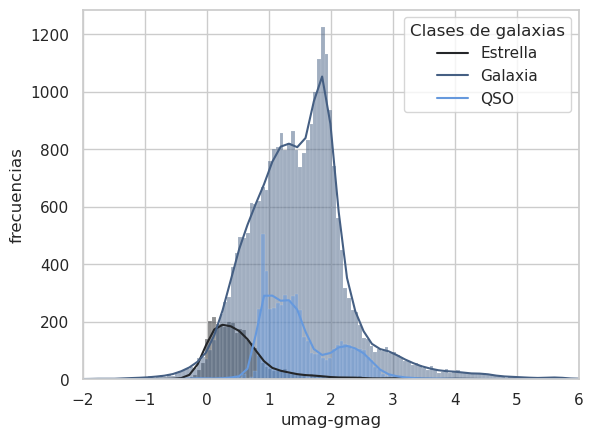

In [906]:
palette=sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.histplot(df, x='umag-gmag', hue='Hclass', kde=True, palette=palette)  
plt.xlim(-2,6)
plt.ylabel('frecuencias')

plt.legend(title='Clases de galaxias', labels=['Estrella', 'Galaxia', 'QSO'])
plt.show()

In [907]:
df['Hclass'].value_counts()

Hclass
1    27572
0     5798
2     3144
Name: count, dtype: int64

In [908]:
#Tengo que definir mis feature, mis variables de entrada, estas son las que utilizamos para entrenar el modelo
features = ['umag', 'gmag', 'rmag', 'imag', 'zmag', 'Ymag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 
            'umag-gmag', 'gmag-rmag', 'rmag-imag', 'imag-zmag', 'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 
            'Hmag-Kmag', 'W1mag-W2mag', 'Yhlr-Jhlr', 'Jhlr-Hhlr', 'Hhlr-Khlr', 'g3mag-r3mag', 'r3mag-i3mag', 
            'i3mag-Z3mag', 'Z3mag-Y3mag', 'Y3mag-J3mag', 'J3mag-H3mag', 'H3mag-K3mag']


In [909]:
df_tr, df_te=train_test_split(df,test_size=0.3,random_state=42)
#Divide el conjunto de datos en entrenamiento (70%) y prueba (30%)

In [910]:
#Ahora dividimos en clases de entrenamiento
X_train = df_tr[features]
y_train = df_tr['Hclass']

#lo mismo con el testeo
X_test=df_te[features]
y_test=df_te['Hclass']


In [911]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [912]:
y_pred=clf.predict(X_test)
#Realiza predicciones en los datos de prueba.

In [913]:
cm=confusion_matrix(y_test,y_pred) #Clase y prediccion, si la prediccion es buena deberia dar una diagonal
#Muestra la matriz de confusión para analizar errores.

In [914]:
print(classification_report(y_test,y_pred)) 
#MUestra para cada calse cual es la precision del ricall y el f1-score
#Hace promedio pesado
#La metrica que evalua la competencia es la media, promedio pesado
#Proporciona métricas detalladas como precisión, recall y F1-score para cada clase.

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1722
           1       0.98      0.98      0.98      8303
           2       0.88      0.88      0.88       930

    accuracy                           0.97     10955
   macro avg       0.94      0.94      0.94     10955
weighted avg       0.97      0.97      0.97     10955



In [915]:
df_submit=pd.read_csv('test.csv')
df_submit.set_index('ID',inplace=True)

In [916]:
#color-color
#df_submit['umag-gmag'] = df_submit['umag'] - df_submit['gmag']
#df_submit['gmag-rmag'] = df_submit['gmag'] - df_submit['rmag']
#df_submit['rmag-imag'] = df_submit['rmag'] - df_submit['imag']
#df_submit['imag-zmag'] = df_submit['imag'] - df_submit['zmag']
#df_submit['zmag-Ymag'] = df_submit['zmag'] - df_submit['Ymag']
#df_submit['Ymag-Jmag'] = df_submit['Ymag'] - df_submit['Jmag']
#df_submit['Jmag-Hmag'] = df_submit['Jmag'] - df_submit['Hmag']
#df_submit['Hmag-Kmag'] = df_submit['Hmag'] - df_submit['Kmag']
#df_submit['Kmag-W1mag'] = df_submit['Kmag'] - df_submit['W1mag']
#df_submit['W1mag-W2mag'] = df_submit['W1mag'] - df_submit['W2mag']
##Magnitudes con radio de diafragma fijo
#df_submit['u3mag-g3mag'] = df_submit['u3mag'] - df_submit['g3mag']
#df_submit['g3mag-r3mag'] = df_submit['g3mag'] - df_submit['r3mag']
#df_submit['r3mag-i3mag'] = df_submit['r3mag'] - df_submit['i3mag']
#df_submit['i3mag-Z3mag'] = df_submit['i3mag'] - df_submit['Z3mag']
#df_submit['Z3mag-Y3mag'] = df_submit['Z3mag'] - df_submit['Y3mag']
#df_submit['Y3mag-J3mag'] = df_submit['Y3mag'] - df_submit['J3mag']
#df_submit['J3mag-H3mag'] = df_submit['J3mag'] - df_submit['H3mag']
#df_submit['H3mag-K3mag'] = df_submit['H3mag'] - df_submit['K3mag']
##Estas no me acuerdo como se llaman pero las agrego tambien
#df_submit['Yhlr-Jhlr'] = df_submit['Yhlr'] - df_submit['Jhlr']
#df_submit['Jhlr-Hhlr'] = df_submit['Jhlr'] - df_submit['Hhlr']
#df_submit['Hhlr-Khlr'] = df_submit['Hhlr'] - df_submit['Khlr']
Bandas=['umag','gmag','rmag','imag','zmag','Ymag','Jmag','Hmag','Kmag','W1mag','W2mag'] #Estas solas magnitudes totales
#Elegimos en principio estas bandas 
#La función len() devuelve la cantidad de elementos en una lista
for i in range(len(Bandas)-1):
    df_submit[f'{Bandas[i]}-{Bandas[i+1]}']=df_submit[Bandas[i]]-df_submit[Bandas[i+1]]
    #dt[f'{Bandas[i]}-{Bandas[i+1]}']=dt[Bandas[i]]-dt[Bandas[i+1]]
Bandas_rad=['u3mag','g3mag','r3mag','i3mag','Z3mag','Y3mag','J3mag','H3mag','K3mag']
#Ahora en la misma linea de codigo, haremos lo mismo para las magnitudes a radio constante 3arcsecond
for i in range(len(Bandas_rad)-1):
    df_submit[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=df_submit[Bandas_rad[i]]-df_submit[Bandas_rad[i+1]]
    #dt[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=dt[Bandas_rad[i]]-dt[Bandas_rad[i+1]]
Bandas_HLR=['Yhlr','Jhlr','Hhlr','Khlr']
for i in range(len(Bandas_HLR)-1):
    df_submit[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=df_submit[Bandas_HLR[i]]-df[Bandas_HLR[i+1]]
    #dt[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=dt[Bandas_HLR[i]]-dt[Bandas_HLR[i+1]]


In [917]:
df_submit = df_submit[features]


In [918]:
prediction= clf.predict(df_submit)

In [919]:
df_submit['Hclass']=prediction

In [920]:
print(df_tr.columns)  # Columnas usadas para el entrenamiento
print(df_submit.columns)  # Columnas del conjunto de predicción


Index(['RAdeg', 'DEdeg', 'Hclass', 'umag', 'gmag', 'rmag', 'imag', 'zmag',
       'Ymag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'u3mag', 'g3mag',
       'r3mag', 'i3mag', 'Z3mag', 'Y3mag', 'J3mag', 'H3mag', 'K3mag', 'Yhlr',
       'Jhlr', 'Hhlr', 'Khlr', 'umag-gmag', 'gmag-rmag', 'rmag-imag',
       'imag-zmag', 'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 'Hmag-Kmag',
       'Kmag-W1mag', 'W1mag-W2mag', 'u3mag-g3mag', 'g3mag-r3mag',
       'r3mag-i3mag', 'i3mag-Z3mag', 'Z3mag-Y3mag', 'Y3mag-J3mag',
       'J3mag-H3mag', 'H3mag-K3mag', 'Yhlr-Jhlr', 'Jhlr-Hhlr', 'Hhlr-Khlr'],
      dtype='object')
Index(['umag', 'gmag', 'rmag', 'imag', 'zmag', 'Ymag', 'Jmag', 'Hmag', 'Kmag',
       'W1mag', 'W2mag', 'umag-gmag', 'gmag-rmag', 'rmag-imag', 'imag-zmag',
       'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 'Hmag-Kmag', 'W1mag-W2mag',
       'Yhlr-Jhlr', 'Jhlr-Hhlr', 'Hhlr-Khlr', 'g3mag-r3mag', 'r3mag-i3mag',
       'i3mag-Z3mag', 'Z3mag-Y3mag', 'Y3mag-J3mag', 'J3mag-H3mag',
       'H3mag-K3mag', 'Hc

In [921]:
df_submit.loc[:,['Hclass']].to_csv('submission.csv',index=True) #Este es el que queremos subir a la competencia
#El besline es este
#En el publico subimos el porcentaje de conjunto de test
#Carga el conjunto de prueba final.
#Predice las clases utilizando el modelo entrenado.
#Guarda las predicciones en un archivo submission.csv para la competencia.

In [922]:
f1_score(y_test,y_pred,average='weighted')

0.9681921700921157

In [923]:
#Me dio horrible, vamos a probar RandomForest, le tengo fe

In [924]:
df_tr, df_te=train_test_split(df,test_size=0.3,random_state=42)


In [925]:
#Ahora dividimos en clases de entrenamiento
X_train = df_tr[features]
y_train = df_tr['Hclass']

#lo mismo con el testeo
X_test=df_te[features]
y_test=df_te['Hclass']

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [926]:
model=RandomForestClassifier()

In [927]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [928]:
y_pred=model.predict(X_test)

In [929]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1688   29    5]
 [   6 8249   48]
 [   1   89  840]]


In [930]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1722
           1       0.99      0.99      0.99      8303
           2       0.94      0.90      0.92       930

    accuracy                           0.98     10955
   macro avg       0.97      0.96      0.97     10955
weighted avg       0.98      0.98      0.98     10955



In [931]:
f1_score(y_test,y_pred,average='weighted')

0.9836345970236318

In [932]:
#Tengo que volver a preparar el conjunto submit
df_submit=pd.read_csv('test.csv')
df_submit.set_index('ID',inplace=True)

In [933]:

Bandas=['umag','gmag','rmag','imag','zmag','Ymag','Jmag','Hmag','Kmag','W1mag','W2mag'] #Estas solas magnitudes totales
#Elegimos en principio estas bandas 
#La función len() devuelve la cantidad de elementos en una lista
for i in range(len(Bandas)-1):
    df_submit[f'{Bandas[i]}-{Bandas[i+1]}']=df_submit[Bandas[i]]-df_submit[Bandas[i+1]]
    #dt[f'{Bandas[i]}-{Bandas[i+1]}']=dt[Bandas[i]]-dt[Bandas[i+1]]
Bandas_rad=['u3mag','g3mag','r3mag','i3mag','Z3mag','Y3mag','J3mag','H3mag','K3mag']
#Ahora en la misma linea de codigo, haremos lo mismo para las magnitudes a radio constante 3arcsecond
for i in range(len(Bandas_rad)-1):
    df_submit[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=df_submit[Bandas_rad[i]]-df_submit[Bandas_rad[i+1]]
    #dt[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=dt[Bandas_rad[i]]-dt[Bandas_rad[i+1]]
Bandas_HLR=['Yhlr','Jhlr','Hhlr','Khlr']
for i in range(len(Bandas_HLR)-1):
    df_submit[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=df_submit[Bandas_HLR[i]]-df[Bandas_HLR[i+1]]
    #dt[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=dt[Bandas_HLR[i]]-dt[Bandas_HLR[i+1]]

In [934]:
print(df_tr.columns)  # estas son las que uso para entrenar
print(df_submit.columns)  #Con esto imprimo las columnas del submir

Index(['RAdeg', 'DEdeg', 'Hclass', 'umag', 'gmag', 'rmag', 'imag', 'zmag',
       'Ymag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'u3mag', 'g3mag',
       'r3mag', 'i3mag', 'Z3mag', 'Y3mag', 'J3mag', 'H3mag', 'K3mag', 'Yhlr',
       'Jhlr', 'Hhlr', 'Khlr', 'umag-gmag', 'gmag-rmag', 'rmag-imag',
       'imag-zmag', 'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 'Hmag-Kmag',
       'Kmag-W1mag', 'W1mag-W2mag', 'u3mag-g3mag', 'g3mag-r3mag',
       'r3mag-i3mag', 'i3mag-Z3mag', 'Z3mag-Y3mag', 'Y3mag-J3mag',
       'J3mag-H3mag', 'H3mag-K3mag', 'Yhlr-Jhlr', 'Jhlr-Hhlr', 'Hhlr-Khlr'],
      dtype='object')
Index(['RAdeg', 'DEdeg', 'umag', 'gmag', 'rmag', 'imag', 'zmag', 'Ymag',
       'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'u3mag', 'g3mag', 'r3mag',
       'i3mag', 'Z3mag', 'Y3mag', 'J3mag', 'H3mag', 'K3mag', 'Yhlr', 'Jhlr',
       'Hhlr', 'Khlr', 'umag-gmag', 'gmag-rmag', 'rmag-imag', 'imag-zmag',
       'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 'Hmag-Kmag', 'Kmag-W1mag',
       'W1mag-W2mag', 'u

In [935]:
df_submit = df_submit[features]


In [936]:
prediction=model.predict(df_submit)

In [937]:
df_submit['Hclass']=prediction

In [938]:
df_submit.loc[:,['Hclass']].to_csv('submission.csv',index=True) #Este es el que queremos subir a la competencia
#Ahora deberia andar, creo


In [939]:
param_grid={
    #'n_estimators':[50,100,150,200,300], #El número de árboles en el bosque. Aumentar este número puede mejorar el rendimiento, pero a costa de mayor tiempo de entrenamiento.
    'max_depth':[3,5,10], #La profundidad máxima de los árboles. Limitar la profundidad puede evitar el sobreajuste
    'min_samples_split':[2,5,10] #podriamos agregar esto ademas #El número mínimo de muestras requeridas para dividir un nodo.
    }

In [940]:
#model=GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring='f1_weighted') 
model=RandomizedSearchCV(RandomForestClassifier(),param_grid,n_iter=5,cv=5,scoring='f1_weighted') 
#Realiza una búsqueda aleatoria de combinaciones de parámetros, lo que puede ser más eficiente cuando tienes muchos hiperparámetros.

In [941]:
model.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [3, 5, 10],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='f1_weighted')

In [942]:
model.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_split=10)

In [943]:
model.best_params_

{'min_samples_split': 10, 'max_depth': 5}

In [944]:
model.cv_results_


{'mean_fit_time': array([4.24529347, 3.0337944 , 2.91945181, 4.48055849, 2.62987113]),
 'std_fit_time': array([0.14813336, 0.13747411, 0.24791054, 0.26454883, 0.02881426]),
 'mean_score_time': array([0.01906257, 0.01853323, 0.01974368, 0.01924772, 0.0150754 ]),
 'std_score_time': array([0.00116098, 0.0026969 , 0.00502815, 0.00070625, 0.00065888]),
 'param_min_samples_split': masked_array(data=[5, 10, 5, 10, 2],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'param_max_depth': masked_array(data=[5, 3, 3, 5, 3],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'params': [{'min_samples_split': 5, 'max_depth': 5},
  {'min_samples_split': 10, 'max_depth': 3},
  {'min_samples_split': 5, 'max_depth': 3},
  {'min_samples_split': 10, 'max_depth': 5},
  {'min_samples_split': 2, 'max_depth': 3}],
 'split0_test_score': array([0.97471518, 0.95223509, 0.95292578, 0.97534882, 0.95522376]),
 'split1_test_score': array([0.9759867

In [945]:
scores=cross_val_score(model,X_train, y_train,cv=5)
print(scores.mean())

0.9825236498005687


In [946]:
model.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [3, 5, 10],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='f1_weighted')

In [947]:
y_pred = model.predict(X_test) #métrica de evaluación que mide la proporción de predicciones correctas que realiza un modelo sobre el total de predicciones
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.9821999087174806


el modelo tiene una tasa de aciertos del 98.22% en el conjunto de prueba.